In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import plotly.express as px
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.linear_model import LinearRegression


# <span style="color:red"> * Read Data<span>

In [2]:
Data = pd.read_csv('stock_market_data.csv')
AMZN = Data[Data['Symbol'] == 'AMZN']
FB = Data[Data['Symbol'] == 'FB']
TSLA = Data[Data['Symbol'] == 'TSLA']
GOOGL = Data[Data['Symbol'] == 'GOOGL']
AAPL = Data[Data['Symbol'] == 'AAPL']

In [3]:
### USER DATABASE ###
user_shares = {}


# <span style="color:red"> * Shares settings<span>

In [4]:
tlist = [AMZN, FB, TSLA, GOOGL, AAPL]
tickers = ['AMZN', 'FB', 'TSLA', 'GOOGL', 'AAPL']
tp = {'AMZN' : list(AMZN['Open'])[-1], 'FB' : list(FB['Open'])[-1], 'TSLA' : list(TSLA['Open'])[-1], 'GOOGL': list(GOOGL['Open'])[-1], 'AAPL': list(AAPL['Open'])[-1]}

<h3> Welcome to NYSE Stock market, please sign up to continue: </h3>

<h6> please enter your first name and last name: </h6>

In [ ]:
name = input()

<h6>please enter your ID number:</h6>

In [ ]:
ID = input()

<h6>please enter you birth date in this format(dd/mm/yyyy):</h6>

In [ ]:
BD = input()

<h6>please enter your balance in US$:</h6>

In [ ]:
Balance = int(input())

<h3>Thanks for your registration, now you have access to trade in Stock market</h3>


# <span style="color:red"> * Stock market portfolio<span>

## to buy shares:

In [ ]:
print(f'Your Balance is : {Balance}')
pick = int(input('''to buy shares, please enter the ticker's number:
1- AMZN
2- FB
3- TSLA
4- GOOGL
5- AAPL
'''))
curr_price = list(tlist[pick-1]['Open'])[-1]
to_buy = int(input(f'{tickers[pick-1]} price is {curr_price} per share, how many shares do you want to buy?'))
if(to_buy * curr_price > Balance):
    print("Insufficient Balance")
else:
    Balance -= to_buy * curr_price
    if tickers[pick-1] in user_shares.keys():
        user_shares[tickers[pick-1]] += to_buy
    else:
        user_shares[tickers[pick-1]] = to_buy
    print(f'You have successfully buy {to_buy} shares of {tickers[pick-1]}, your new Balance is : {Balance}$')
        

## to sell shares:

In [ ]:
d = {'Shares': list(user_shares.keys()), 'Quantities': list(user_shares.values())}
df2 = pd.DataFrame(data=d)
ins = list(df2['Quantities'])
df2 = df2.set_index('Quantities')
if 0 in ins:
    df2 = df2.drop(0)
df2 = df2.reset_index()
print(f'Your Shares are listed Below :')
if len(df2):
    print(df2.to_markdown())
pick = int(input('''to sell shares, please enter the ticker's number:
1- AMZN
2- FB
3- TSLA
4- GOOGL
5- AAPL
'''))
if tickers[pick-1] in user_shares.keys() and user_shares[tickers[pick-1]] != 0:   
    curr_price = list(tlist[pick-1]['Open'])[-1]
    to_sell = int(input(f'{tickers[pick-1]} price is {curr_price} per share and you have {user_shares[tickers[pick-1]]} shares, how many shares of yours do you want to sell?'))
    if(to_sell > int(user_shares[tickers[pick-1]])):
        print("Insufficient Shares!")
    else:
        user_shares[tickers[pick-1]] -= to_sell
        Balance += to_sell * curr_price
        print(f'You have successfully sell {to_sell} shares of {tickers[pick-1]}, your new Balance is : {Balance}')
else:
    print(f'You do not have any {tickers[pick-1]} shares in your portfolio!')

## to check charts:

to check the charts, please enter the ticker's number:
1- AMZN
2- FB
3- TSLA
4- GOOGL
5- AAPL
1


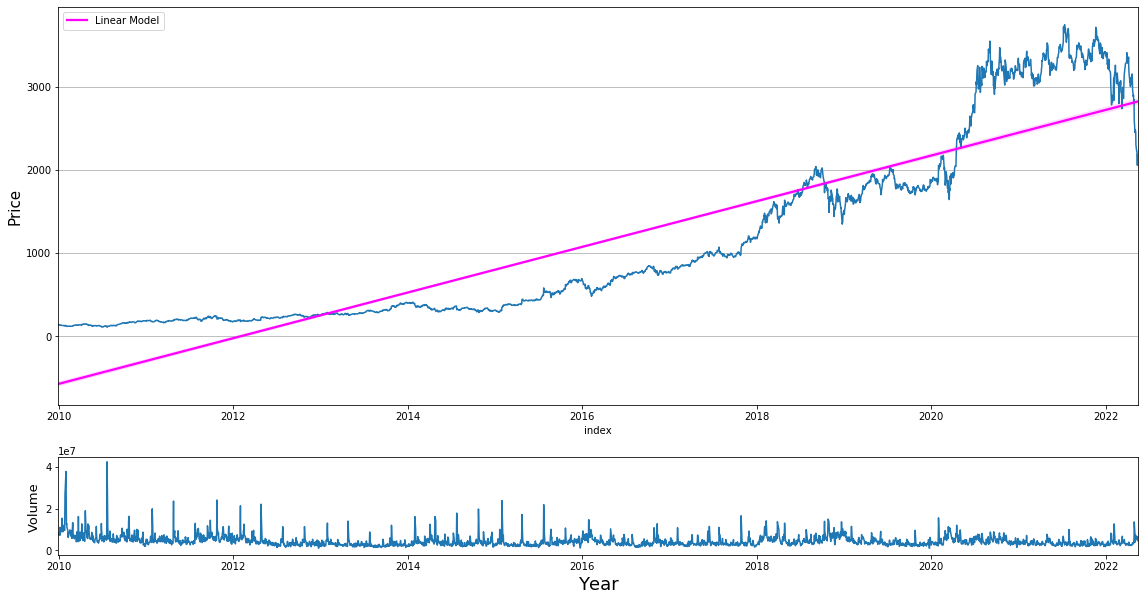

In [5]:
num = int(input('''to check the charts, please enter the ticker's number:
1- AMZN
2- FB
3- TSLA
4- GOOGL
5- AAPL
'''))
if num in range(1,6):
    df = pd.DataFrame()
    df['Open'] = tlist[num-1]['Open']
    df.index = [datetime.strptime(x, "%Y-%m-%d") for x in list(tlist[num-1]['Date'])]
    df.index = df.index.map(pd.Timestamp.toordinal)
    data=df.loc[:].reset_index()
#     ax1 = df.plot(y='Open', c='b', figsize=(15.8, 6), grid=True, legend=False)
#     sns.regplot(data=data, x='index', y='Open', ax=ax1, color='magenta', scatter_kws={'s': 7}, label='Linear Model', scatter=False)

#     ax1.set_xlim(df.index[0], df.index[-1])

#     convert the axis back to datetime
#     xticks = ax1.get_xticks()
#     labels = [pd.Timestamp.fromordinal(int(label)).date() for label in xticks]
#     ax1.set_xticks(xticks[1:])
#     ax1.set_xticklabels(labels)

#     ax1.legend()
#     plt.show()
    
    
    
    xax = list(tlist[num-1]['Date'])
    yax = list(tlist[num-1]['Open'])
    vol = list(tlist[num-1]['Volume'])
    xs = [datetime.strptime(x, "%Y-%m-%d") for x in xax]
    plt.figure(figsize=(16,10))
    plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
    plt.plot(xs, yax)
    sns.regplot(data=data, x='index', y='Open',color='magenta', scatter_kws={'s': 7}, label='Linear Model', scatter=False)
    plt.grid(axis='y')
    plt.ylabel('Price', fontsize=15)
    plt.legend()
    plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
    plt.plot(xs, vol)
    sns.regplot(data=data, x='index', y='Open',color='white', scatter_kws={'s': 7}, label='Linear Model', scatter=False)
    plt.ylabel('Volume', fontsize = 13)
    plt.xlabel('Year', fontsize=18)
    plt.tight_layout()
    plt.show()
else:
    print("Wrong ticker number!")

## to check shares list:

In [ ]:
df3 = pd.DataFrame(user_shares.items())
df3.columns = ['Ticker', 'Quantity']
taa = list(df3['Quantity'])
df3['Value in $'] = [tp[i] * user_shares[i] for i in user_shares.keys()]
df3 = df3[df3.Quantity != 0]
print(df3.to_markdown())